# Trung Vo's Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

from collections import defaultdict

### Dataset
We used a realestate dataset from Kaggle to produce this reduced dataset. This dataset contains the _sale price_ and _above ground square feet_ of many houses. We can use this data for our linear regression.

We use Pandas to read the data file which is stored as Comma Separated Values (CSV). and print the column labels. CSV files are similar to excel sheets.

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')

# Calculated line

In [3]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


# Helpers

In [4]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [5]:
def model(x,m,b):
    return m * x + b

In [6]:
def loss(x,y,m,b):
    y_predicted = model(x,m,b)
    return np.power( y - y_predicted, 2 )

In [7]:
def updated_m(x,y,m,b,learning_rate):
    dL_dm = - 2 * x * (y - model(x,m,b))
    dL_dm = np.mean(dL_dm)
    return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
    dL_db = - 2 * (y - model(x,m,b))
    dL_db = np.mean(dL_db)
    return b - learning_rate * dL_db

## Q1. Mini Batch Training

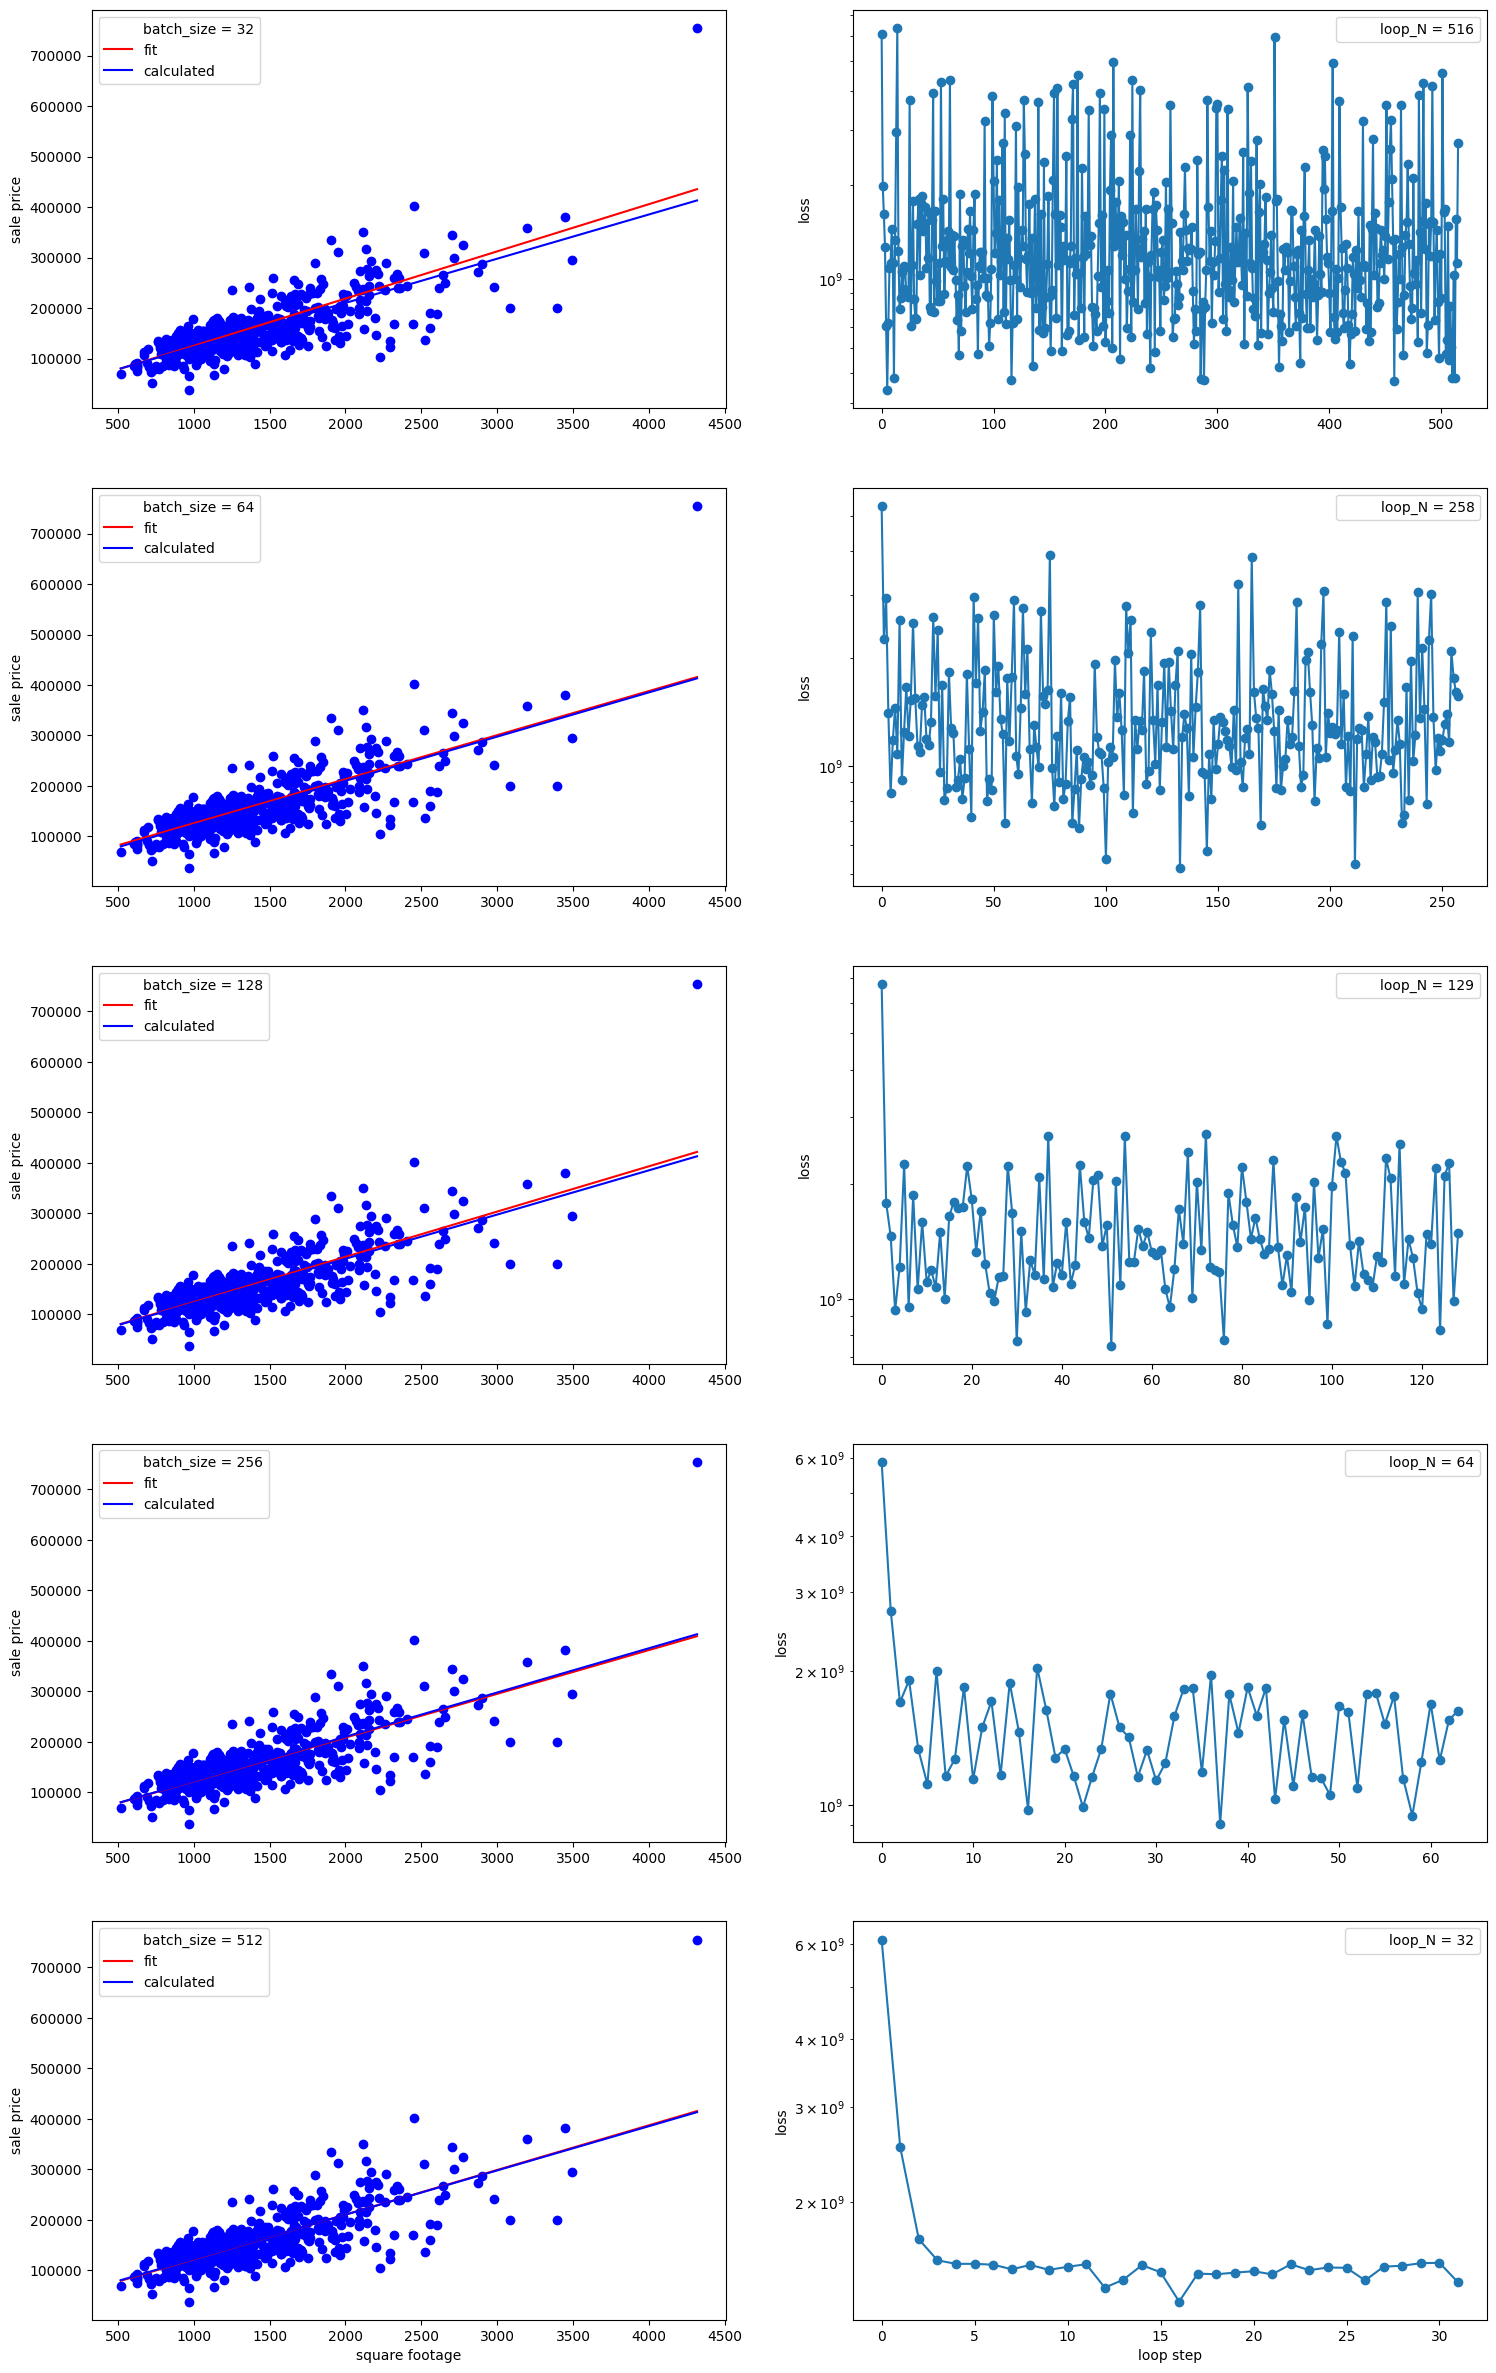

In [8]:
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
batch_sizes = [32, 64, 128, 256, 512]
loss_history = defaultdict(list)
m = [5.]*5
b = [1000.]*5
loop_N = [0]*5

for j, batch_size in enumerate(batch_sizes):
    loop_N[j] = 30*len(data['GrLivArea'])//batch_size
    for i in range(loop_N[j]):
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        # update our slope and intercept based on the current values
        m[j] = updated_m(data_x, data_y, m[j], b[j], learning_rate_m)
        b[j] = updated_b(data_x, data_y, m[j], b[j], learning_rate_b)

        # calculate the loss value
        loss_value = np.mean(loss(data_x, data_y, m[j], b[j]))

        # keep a history of our loss values
        loss_history[j].append(loss_value)


fig, axs = plt.subplots(5,2, figsize=(18,30), dpi=100)
# fig.subplots_adjust(hspace=0)

for j, batch_size in enumerate(batch_sizes):
    axs[j, 0].plot([], [], label = "batch_size = " + str(batch_size), color = 'white') 
    axs[j, 1].plot([], [], label = "loop_N = " + str(loop_N[j]), color = 'white')

    # lot our usual output
    plot_data(data_x,data_y,m[j],b[j], axs[j, 0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    axs[j, 0].plot(line_x,line_y,'b-',label='calculated')

    # add a legend to the plot and x/y labels
    axs[j, 0].legend()
    if j == 4:
        axs[j, 0].set_xlabel('square footage')
    axs[j, 0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history[j]))
    loss_y = np.asarray(loss_history[j])
    axs[j, 1].plot(loss_x,loss_y, 'o-')
    axs[j, 1].set_yscale('log')
    if j == 4:
        axs[j, 1].set_xlabel('loop step')
    axs[j, 1].set_ylabel('loss')
    axs[j, 1].legend()

plt.show()
    


## Q2. Learning rate issue

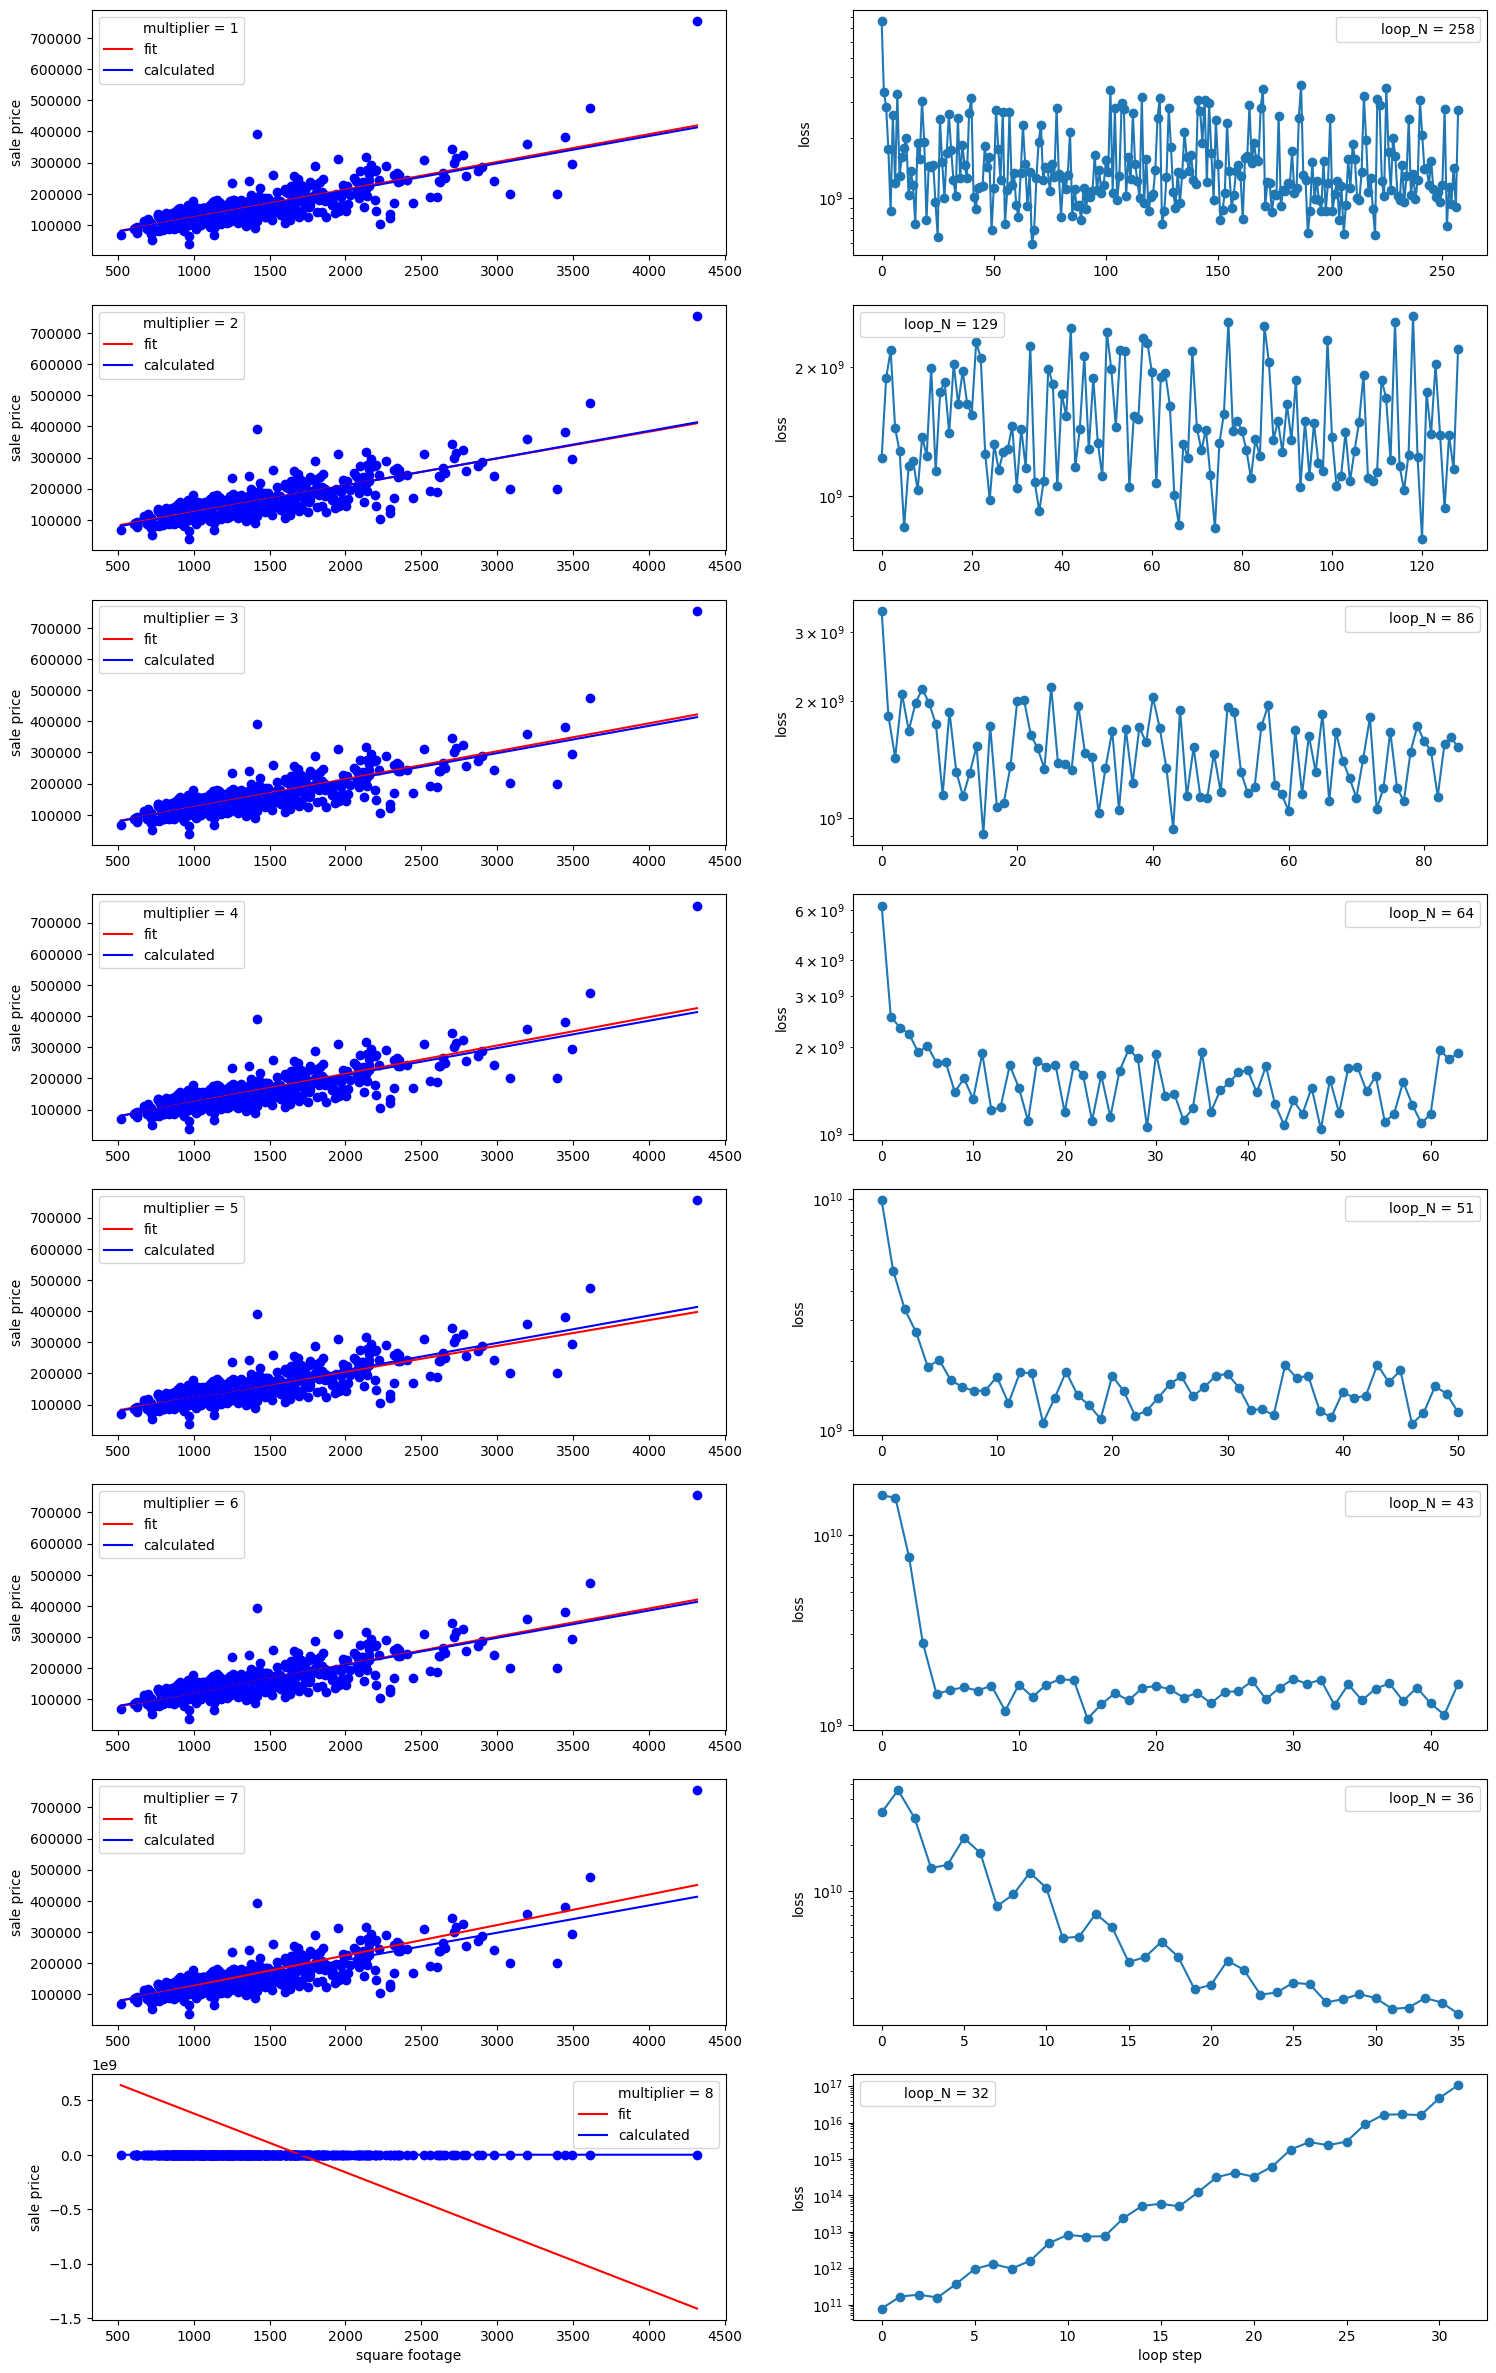

In [9]:
loss_history = defaultdict(list)
m = [5.]*8
b = [1000.]*8
loop_N = [0]*8
# 8 is the maximum multiplier because len(data) is 512

for j in range(8):
    mult = j + 1
    batch_size = 64 * mult
    learning_rate_m = 1e-7 * mult
    learning_rate_b = 1e-1 * mult
    loop_N[j] = 30*len(data['GrLivArea'])//batch_size
    for i in range(loop_N[j]):
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        # update our slope and intercept based on the current values
        m[j] = updated_m(data_x, data_y, m[j], b[j], learning_rate_m)
        b[j] = updated_b(data_x, data_y, m[j], b[j], learning_rate_b)

        # calculate the loss value
        loss_value = np.mean(loss(data_x, data_y, m[j], b[j]))

        # keep a history of our loss values
        loss_history[j].append(loss_value)


fig, axs = plt.subplots(8,2, figsize=(18,30), dpi=100)
# fig.subplots_adjust(hspace=0)

for j in range(8):
    axs[j, 0].plot([], [], label = "multiplier = " + str(j+1), color = 'white') 
    axs[j, 1].plot([], [], label = "loop_N = " + str(loop_N[j]), color = 'white')

    # lot our usual output
    plot_data(data_x,data_y,m[j],b[j], axs[j, 0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    axs[j, 0].plot(line_x,line_y,'b-',label='calculated')

    # add a legend to the plot and x/y labels
    axs[j, 0].legend()
    if j == 7:
        axs[j, 0].set_xlabel('square footage')
    axs[j, 0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history[j]))
    loss_y = np.asarray(loss_history[j])
    axs[j, 1].plot(loss_x,loss_y, 'o-')
    axs[j, 1].set_yscale('log')
    if j == 7:
        axs[j, 1].set_xlabel('loop step')
    axs[j, 1].set_ylabel('loss')
    axs[j, 1].legend()

plt.show()

### So, with (64, 1e-7, 1e-1) * 8, the loss function does not converge.